#  A Highly Scientific Analysis of NYC Chinese Restaurant Names

In [247]:
import pandas as pd

In [248]:
header_list = ["restaurant_names"]

In [249]:
df = pd.read_csv("C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\a_highly_scientific_analysis_of_chinese_restaurant_names\\chinese_restaurant_names.csv",names=header_list)

In [250]:
df.head()

restaurant_names
0                namesYASO
1            Dumpling Town
2               Chow House
3          Blue Willow 夜来湘
4  Szechuan Mountain House

In [251]:
df.loc[0]

restaurant_names    namesYASO
Name: 0, dtype: object

In [252]:
df.loc[0] = "YASO"

In [253]:
df.shape

(299, 1)

In [254]:
df.value_counts().head(10)

restaurant_names        
Ma LaLa                     22
Dimmer & Summer             21
Cheng Du Chinese Cuisine    20
Xi’an Famous Foods           6
YASO                         4
Dim Sum Palace               4
3 Times                      3
Chinah                       3
Silky Kitchen                3
Han Dynasty                  3
dtype: int64

In [255]:
df_unique = df.drop_duplicates()

In [256]:
df_unique.shape

(215, 1)

In [257]:
df_unique.value_counts()

restaurant_names            
3 Times                         1
New Chin Chin Wu Restaurant     1
New Double Dragon               1
New Fuleen Palace Restaurant    1
New Moon                        1
                               ..
Hao Noodle - West Village       1
Hao Noodle Chelsea              1
Happy Hot Hunan                 1
Hardee                          1
Zhongzhong Noodles - Bronx      1
Length: 215, dtype: int64

In [258]:
provinces_and_cities_list = ["Anhui", "Beijing", "Chongqing", "Fujian", "Gansu", "Guangdong", "Guangxi", 
"Guizhou", "Hainan", "Hebei", "Heilongjiang", "Henan", "Hubei", "Hunan", "Inner Mongolia", 
"Jiangsu", "Jiangxi", "Jilin", "Liaoning", "Ningxia", "Qinghai", "Shaanxi", "Shandong", 
"Shanghai", "Shanxi", "Sichuan", "Tianjin", "Tibet", "Xinjiang", "Yunnan", "Zhejiang", 'China', 'Tibet', 'Hong Kong', 'Taiwan',"Shanghai",
    "Beijing",
    "Guangzhou",
    "Shenzhen",
    "Tianjin",
    "Chengdu",
    "Chongqing",
    "Wuhan",
    "Hangzhou",
    "Dongguan",
    "Nanjing",
    "Xi'an",
    "Shenyang",
    "Hefei",
    "Suzhou",
    "Foshan",
    "Zhengzhou",
    "Changsha",
    "Harbin",
    "Qingdao",
    "Kunming",
    "Guiyang",
    "Ningbo",
    "Taiyuan",
    "Jinan"]

In [259]:
df_unique[df_unique['restaurant_names'].str.contains('Noodle')]

restaurant_names
10             Very Fresh Noodles
23                 Noodle Village
34          DunHuang Miss Noodles
41      Tasty Hand-Pulled Noodles
43             Hao Noodle Chelsea
81      Hao Noodle - West Village
109    YunShang Rice Noodle House
145          Great NY Noodle Town
193                    Noodle Fun
197  Tasty Hand Pulled Noodles II
199      E Noodle 粥麵館 - Chinatown
202    Zhongzhong Noodles - Bronx
223         The Handpulled Noodle
232       Yummy Noodle House 粥麵之家
266     Tonii’s Fresh Rice Noodle
281                   Noodlecraft

In [260]:
df_unique

restaurant_names
0                                  YASO
1                         Dumpling Town
2                            Chow House
3                       Blue Willow 夜来湘
4               Szechuan Mountain House
..                                  ...
293                     Oriental Garden
294  Uncle Ted’s Modern Chinese Cuisine
295                 Shanghai You Garden
296        New Fuleen Palace Restaurant
297                          China King

[215 rows x 1 columns]

In [261]:
words = df_unique['restaurant_names'].str.split(' ', expand=True)
words = words.stack().reset_index(level=1, drop=True).rename('word')

In [262]:
words.value_counts()

Restaurant    19
Kitchen       17
House         13
-             13
Chinese       13
              ..
Lai            1
YunShang       1
Wo             1
MáLà           1
Fuleen         1
Name: word, Length: 357, dtype: int64

In [263]:
word_count_df = pd.DataFrame(words.value_counts())

In [264]:
len(word_count_df)

357

In [265]:
word_count_df.reset_index(inplace=True)

In [266]:
word_count_df.columns = ['word', 'count']

In [267]:
len(word_count_df)

357

In [268]:
char_list = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '+', '~', 
'/', '\\', '{', '}', '[', ']', ';', ':', '"', "'", ',', '<', '>', '.', '?', 'the','to','To' ,'On','The','of', 'Of', 'And', 'and', 'by', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '21', '95', '99', 'A', 'a']

In [269]:
import re

In [270]:
word_count_df = word_count_df[~word_count_df['word'].isin(char_list)]

In [271]:
word_count_df['percent_of_words'] = word_count_df['count']/sum(word_count_df['count'])



In [272]:
word_count_df['percent_of_restaurants'] = word_count_df['count']/len(df_unique)

In [273]:
fifty_family_names = ['Wang', 'Li', 'Zhang', 'Liu', 'Chen', 'Yang', 
'Huang', 'Zhao', 'Wu', 'Zhou', 'Xu', 'Sun', 'Ma', 'Luo', 'Gao', 'He', 
'Zhang', 'Lin', 'Zhu', 'Jiang', 'Ye', 'Qian', 'Feng', 'Cao', 'Cui', 'Wen', 
'Cheng', 'Dai', 'Dong', 'Hu', 'Ji', 'Han', 'Guan', 'Ou', 'Qian', 'Qin', 
'Song', 'Su', 'Tang', 'Tian', 'Wei', 'Xia', 'Yan', 'Ye', 'Yuan', 'Yue', 
'Zhang', 'Zheng', 'Zhu', 'Zou']

In [274]:
chinese_restaurant_animals = ['Phoenix', 'Dragon', 'Tiger', 'Dragonfly', 'Elephant', 
'Fish', 'Panda', 'Crane', 'Lion', 'Turtle', 'Swan', 'Shark', 'Cat', 'Rabbit', 'Horse', 
'Snake', 'Frog', 'Rooster', 'Duck', 'Fox', 'Stork', 'Peacock', 'Monkey', 'Wolf', 'Lamb', 
'Antelope', 'Swallow', 'Sparrow', 'Bat', 'Deer', "Hen", 'Bull', 'Cow', 'Pig', 'Bird']

In [275]:
chinese_city_names = ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Chongqing', 'Tianjin', 
'Wuhan', 'Hangzhou', 'Chengdu', 'Nanjing', "Xi'an", 'Fuzhou', 'Xiamen', 'Qingdao', 'Shenyang', 
'Suzhou', 'Zhengzhou', 'Dalian', 'Changsha', 'Nanchang', 'Kunming', 'Guilin', 'Shantou', 
'Zhongshan', 'Taizhou', 'Wuxi', 'Zibo', 'Hohhot', 'Yantai', 'Hefei', 'Jinan', 'Huizhou', 
'Changzhou', 'Urumqi', 'Harbin', 'Weifang', 'Jiaxing', 'Baotou', 'Lanzhou', 'Ningbo',
'Taiyuan', 'Jilin', 'Luoyang', 'Datong', 'Linyi', 'Xining']

In [276]:
chinese_restaurant_foods = ['Wonton','Roll','Noodle','Noodles','Apricot' 'Dumpling', 'Dumplings','Dim Sum', 'Pot',
'Mapo', 'Tofu', 'Chow Mein', 'Spring Roll', 'Sweet and Sour', 'Kung Pao Chicken', 
'Beef and Broccoli', 'Egg Foo Young', 'Egg', 'Rolls', 'Wonton', 'Pot Sticker', 
'Chicken and Cashews', "General Tso's Chicken", 'Cashew Chicken', 'Chow Fun', 
'Beef and Snow Peas', 'Orange Chicken', 'Mongolian Beef', 'Eggplant in Garlic Sauce', 
'Szechuan Chicken', 'Pork Fried Rice', 'Beef Chow Mein', 'Broccoli and Beef', 'Pepper Steak', 
'Garlic Chicken', 'Teriyaki', 'Chicken', 'Mu Shu Pork', 'Moo Goo Gai Pan', 'Crab', 'Rangoon', 
'Lo Mein', 'Peking,' ,'Duck', 'Beef and Broccoli', 'Shrimp', 'Fried' ,'Rice', 'Sesame', 
'Egg Drop Soup', 'Chicken and Broccoli', 'Baozi', 'Bao', 'Miso', 'Soup','noodles', 'Spice','Chai','Nut', "Rangoon", 'Apple','CHILI', 'Chili' 'Food', 'Mayo', 'Cuisine', 'Food']

In [277]:
import re

In [278]:
word_count_df.sort_values(by='count', ascending=False).head(30)

word  count  percent_of_words  percent_of_restaurants
0   Restaurant     19          0.033451                0.088372
1      Kitchen     17          0.029930                0.079070
2        House     13          0.022887                0.060465
4      Chinese     13          0.022887                0.060465
5     Shanghai     12          0.021127                0.055814
6       Noodle     10          0.017606                0.046512
7        China      9          0.015845                0.041860
9          New      7          0.012324                0.032558
11     Village      6          0.010563                0.027907
12         Wok      6          0.010563                0.027907
10    Dumpling      6          0.010563                0.027907
13       Taste      5          0.008803                0.023256
14     Cuisine      5          0.008803                0.023256
15      Garden      5          0.008803                0.023256
18         Dim      5          0.008803                0.023256
19     Noodles      5          0.008803                0.023256
26       Spicy      4          0.007042                0.018605
30       Hunan      4          0.007042                0.018605
29        West      4          0.007042                0.018605
28         Bao      4          0.007042                0.018605
27        Soup      4          0.007042                0.018605
21     Chelsea      4          0.007042                0.018605
25         Bar      4          0.007042                0.018605
24        King      4          0.007042                0.018605
23      Golden      4          0.007042                0.018605
22       Asian      4          0.007042                0.018605
20         Wah      4          0.007042                0.018605
39        Rice      3          0.005282                0.013953
46       Joe’s      3          0.005282                0.013953
45         Sum      3          0.005282                0.013953

In [279]:
import re
import numpy as np

In [280]:
precious_metals = ["Gold", "Silver", "Platinum", "Diamond", "Jade", "Ruby", 
                   "Sapphire", "Emerald", "Opal", "Amethyst", "Topaz",
                     "Aquamarine", "Tourmaline", "Garnet", "Citrine", 
                     "Peridot", "Zircon", "Tanzanite", "Turquoise", "Moonstone", 
                     "Onyx", "Jade", "Iolite", "Spinel", "Lapis Lazuli", "Malachite"]

In [281]:
chinese_provinces_list = ["Anhui", "Beijing", "Chongqing", "Fujian", "Gansu", "Guangdong", "Guangxi", "Guizhou", "Hainan", "Hebei", "Heilongjiang", 
                          "Henan", "Hubei", "Hunan", "Jiangsu", "Jiangxi", "Jilin", "Liaoning", "Qinghai", "Shaanxi", "Shandong", "Shanghai", 
                          "Shanxi", "Sichuan", "Tianjin", "Tibet", "Xinjiang", "Yunnan", "Zhejiang"]

In [282]:
tastes = ['Sweet', 'Sour', 'Spicy', 'Salty', 'Bitter', 'Tasty', "Taste", 'Hot', 'Cold', 'Silky', 'Yum', 'Fresh', 'Delicious', 'Excellent', 'Good' ]

In [283]:
sun_moon_old_new_list = ['Sun', 'Moon', 'Old', 'New']

In [284]:
direction_list = ['North', 'South', 'East', 'West', 'Southeast', 'Southwest', 'Northeast', 'Northwest', 'Central']

In [285]:
places_list = ['Restaurant', 'Bar', 'Kitchen', 'Lounge', 'House', 'Garden', 'Room', 'Village', 'City', 'Town', 'Eatery', 'Home', 'Diner', 'house', 'Eatery', 'Pub', 'Bistro', 'Alley', 'Forest', 'Orchard']

In [286]:
royalty_list = ['King','Queen','Prince', 'Princess', 'Emperor', 'Grand' , 'Great','Empire', 'Royal', 'Dynasty', 'Crown', 'Palace', 'Noble', 'Empress', 'Imperial']

In [287]:
word_count_df.sort_values(by='count', ascending=False).head(30)

word  count  percent_of_words  percent_of_restaurants
0   Restaurant     19          0.033451                0.088372
1      Kitchen     17          0.029930                0.079070
2        House     13          0.022887                0.060465
4      Chinese     13          0.022887                0.060465
5     Shanghai     12          0.021127                0.055814
6       Noodle     10          0.017606                0.046512
7        China      9          0.015845                0.041860
9          New      7          0.012324                0.032558
11     Village      6          0.010563                0.027907
12         Wok      6          0.010563                0.027907
10    Dumpling      6          0.010563                0.027907
13       Taste      5          0.008803                0.023256
14     Cuisine      5          0.008803                0.023256
15      Garden      5          0.008803                0.023256
18         Dim      5          0.008803                0.023256
19     Noodles      5          0.008803                0.023256
26       Spicy      4          0.007042                0.018605
30       Hunan      4          0.007042                0.018605
29        West      4          0.007042                0.018605
28         Bao      4          0.007042                0.018605
27        Soup      4          0.007042                0.018605
21     Chelsea      4          0.007042                0.018605
25         Bar      4          0.007042                0.018605
24        King      4          0.007042                0.018605
23      Golden      4          0.007042                0.018605
22       Asian      4          0.007042                0.018605
20         Wah      4          0.007042                0.018605
39        Rice      3          0.005282                0.013953
46       Joe’s      3          0.005282                0.013953
45         Sum      3          0.005282                0.013953

In [288]:
word_count_df['category'] = np.where(word_count_df['word'].str.contains('|'.join(chinese_restaurant_foods), re.I, regex=True),'food', 
np.where(word_count_df['word'].isin(fifty_family_names), 'family name', 
np.where(word_count_df['word'].str.contains('|'.join(royalty_list), re.I, regex=True), 'royalty', 
np.where(word_count_df['word'].isin(chinese_restaurant_animals), 'animals', 
np.where(word_count_df['word'].str.contains('|'.join(tastes),re.I, regex=True), 'tastes', 
np.where(word_count_df['word'].str.contains('|'.join(precious_metals),re.I, regex=True), 'precious metal',
np.where(word_count_df['word'].str.contains('|'.join(places_list), re.I, regex=True), 'places',
np.where(word_count_df['word'].str.contains('|'.join(direction_list), re.I, regex=True), 'direction',
np.where(word_count_df['word'].str.contains('|'.join(provinces_and_cities_list), re.I, regex=True), 'province', 'other')))))))))


In [289]:
word_count_df = word_count_df.reset_index()

In [290]:
word_count_df.drop(columns='index',axis=0)

word  count  percent_of_words  percent_of_restaurants  category
0    Restaurant     19          0.033451                0.088372    places
1       Kitchen     17          0.029930                0.079070    places
2         House     13          0.022887                0.060465    places
3       Chinese     13          0.022887                0.060465     other
4      Shanghai     12          0.021127                0.055814  province
..          ...    ...               ...                     ...       ...
335         Lai      1          0.001761                0.004651     other
336    YunShang      1          0.001761                0.004651     other
337          Wo      1          0.001761                0.004651     other
338        MáLà      1          0.001761                0.004651     other
339      Fuleen      1          0.001761                0.004651     other

[340 rows x 5 columns]

In [291]:
drop_hanzi = word_count_df['word'].sort_values( ascending=False).head(10)

In [292]:
drop_hanzi = drop_hanzi.to_numpy()

In [293]:
word_count_df = word_count_df[~word_count_df['word'].str.contains('|'.join(drop_hanzi))]

In [294]:
word_count_df.to_csv("nyc_chinese_restaurant_data_clean.csv")

# Vizualizations

In [295]:
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Word Cloud

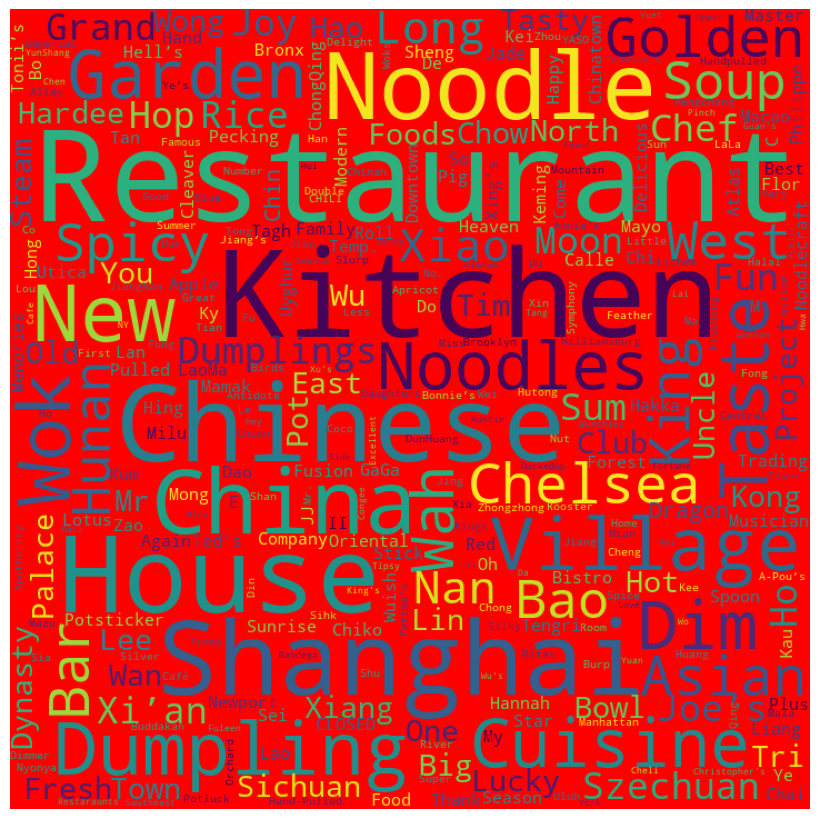

In [296]:
wordcloud=WordCloud(width=720, height=720, margin=0,background_color='Red',
max_words = len(word_count_df['word'])).generate_from_frequencies(dict(zip(word_count_df['word'],
word_count_df['count'])))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout(pad=0)

plt.savefig("word_cloud1.png", dpi=300)


In [297]:
word_count_df['rank'] = word_count_df['count'].rank(ascending=False)

In [298]:
word_count_df['rank'] = word_count_df['rank'].astype(int)

In [299]:
word_count_df.sort_values(by='count', ascending=False)

index        word  count  percent_of_words  percent_of_restaurants  \
0        0  Restaurant     19          0.033451                0.088372   
1        1     Kitchen     17          0.029930                0.079070   
2        2       House     13          0.022887                0.060465   
3        4     Chinese     13          0.022887                0.060465   
4        5    Shanghai     12          0.021127                0.055814   
..     ...         ...    ...               ...                     ...   
169    180         Sei      1          0.001761                0.004651   
170    181    Downtown      1          0.001761                0.004651   
171    182    Philippe      1          0.001761                0.004651   
172    183          JJ      1          0.001761                0.004651   
339    356      Fuleen      1          0.001761                0.004651   

     category  rank  
0      places     1  
1      places     2  
2      places     3  
3       other     3  
4    province     5  
..        ...   ...  
169     other   205  
170     other   205  
171     other   205  
172     other   205  
339     other   205  

[330 rows x 7 columns]

### Circular Lollipop Plot

In [300]:
import random

In [301]:
COUNTS = word_count_df['count']

In [302]:
COUNTS = COUNTS.to_list()

In [303]:
random.seed(23)
random.shuffle(COUNTS)

In [304]:
COUNT_MIN = np.min(COUNTS)
COUNT_MAX = np.max(COUNTS)

In [305]:
len(COUNTS)

330

In [306]:
# low and high refer to the final dot size in the lolipop
def scale_to_interval(x, low=1, high=80):
    return ((x -COUNT_MIN ) / (COUNT_MAX - COUNT_MIN)) * (high - low) + low

### Basic Circular Plot

In [307]:
# Different shades of grey used in the plot
GREY88 = "#e0e0e0"
GREY85 = "#d9d9d9"
GREY82 = "#d1d1d1"
GREY79 = "#c9c9c9"
GREY97 = "#f7f7f7"
GREY60 = "#999999"

In [308]:
# values for the x axis
ANGLES = np.linspace(0, 2 * np.pi, len(COUNTS), endpoint=False)

#heights of the lines and y-position of the dot are given by the word count
HEIGHTS = np.array(COUNTS)

#category values for the colors
CATEGORY_CODES = pd.Categorical(word_count_df['category']).codes

In [309]:
# Colormap taken from https://carto.com/carto-colors/
COLORMAP = ["#7F3C8D","#11A579","#3969AC","#F2B701","#E73F74","#80BA5A","#E68310","#008695","#CF1C90","#f97b72","#4b4b8f","#A5AA99"]

In [310]:
# Select colors for each word according to its category.
COLORS = np.array(COLORMAP)[CATEGORY_CODES]

In [311]:
# This is going to be helpful to create some space for labels within the circle 
PLUS = 1.5

In [312]:
word_count_df.sort_values(by='count', ascending=False).head(8)

index        word  count  percent_of_words  percent_of_restaurants  \
0      0  Restaurant     19          0.033451                0.088372   
1      1     Kitchen     17          0.029930                0.079070   
2      2       House     13          0.022887                0.060465   
3      4     Chinese     13          0.022887                0.060465   
4      5    Shanghai     12          0.021127                0.055814   
5      6      Noodle     10          0.017606                0.046512   
6      7       China      9          0.015845                0.041860   
7      9         New      7          0.012324                0.032558   

   category  rank  
0    places     1  
1    places     2  
2    places     3  
3     other     3  
4  province     5  
5      food     6  
6  province     7  
7     other     8

In [313]:
# Create a data frame with the information for the four words that are going to be labeled
LABELS_DF = word_count_df[word_count_df['count'] >= 9].reset_index()

#create labels
LABELS_DF['label'] = [
    f"{word}\nCount: {int(count)}"
    for word, count in zip(LABELS_DF['word'], LABELS_DF['count'])
]
# set position of the labels
LABELS_DF["x"] = [97, 165, 253, 69, 240, 126, 184]
LABELS_DF["y"] = [57, 27, 20, 37, 27, 23, 18]

In [314]:
LABELS_DF

level_0  index        word  count  percent_of_words  \
0        0      0  Restaurant     19          0.033451   
1        1      1     Kitchen     17          0.029930   
2        2      2       House     13          0.022887   
3        3      4     Chinese     13          0.022887   
4        4      5    Shanghai     12          0.021127   
5        5      6      Noodle     10          0.017606   
6        6      7       China      9          0.015845   

   percent_of_restaurants  category  rank                  label    x   y  
0                0.088372    places     1  Restaurant\nCount: 19   97  57  
1                0.079070    places     2     Kitchen\nCount: 17  165  27  
2                0.060465    places     3       House\nCount: 13  253  20  
3                0.060465     other     3     Chinese\nCount: 13   69  37  
4                0.055814  province     5    Shanghai\nCount: 12  240  27  
5                0.046512      food     6      Noodle\nCount: 10  126  23  
6                0.041860  province     7        China\nCount: 9  184  18

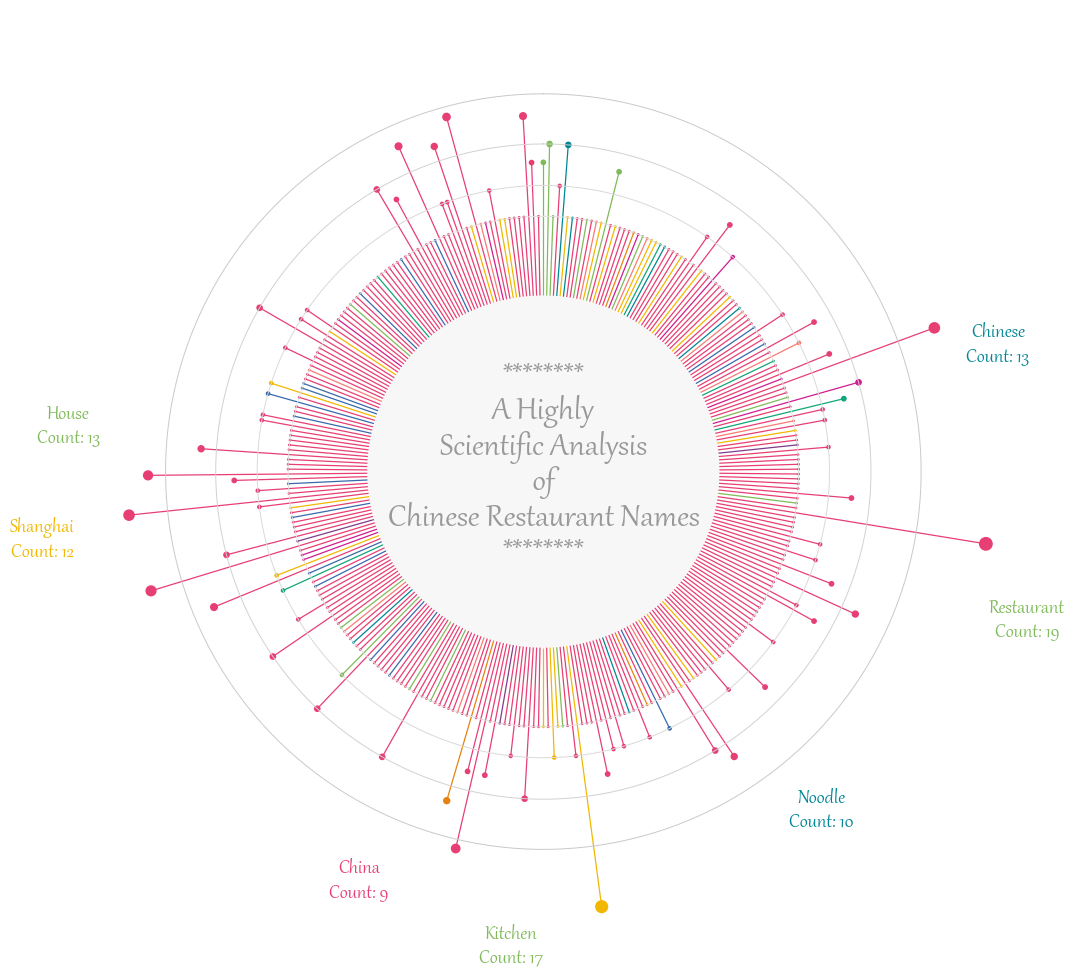

In [315]:
#initialize the layout in polar coordinates
fig, ax = plt.subplots(figsize=(12,12), subplot_kw={"projection": "polar"})


# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

# Use logarithmic scale for the radial axis
ax.set_rscale('symlog')

# Angular axis starts at 90 degrees, not at 0
ax.set_theta_offset(np.pi / 2)

# Reverse the direction to go counter-clockwise.
ax.set_theta_direction(-1)

# Add lines
ax.vlines(ANGLES, 0 + PLUS, HEIGHTS + PLUS, color=COLORS, lw=0.9)

# Add dots
ax.scatter(ANGLES, HEIGHTS + PLUS, s=scale_to_interval(HEIGHTS), color=COLORS)

# remove spines for both axes
ax.spines["start"].set_color('none')
ax.spines["polar"].set_color("none")

#remove gridlines, ticks, tick labels
ax.grid(False)
ax.set_xticks([])
ax.set_yticklabels([])


# Add our custom grid lines for the radial axis.
# These lines indicate 1, 2, 4, 8 instances of the word
HANGLES = np.linspace(0, 2 * np.pi, 200)
ax.plot(HANGLES, np.repeat(1 + PLUS, 200), color= GREY88, lw=0.7)
ax.plot(HANGLES, np.repeat(2 + PLUS, 200), color= GREY85, lw=0.7)
ax.plot(HANGLES, np.repeat(4 + PLUS, 200), color= GREY82, lw=0.7)
ax.plot(HANGLES, np.repeat(8 + PLUS, 200), color= GREY79, lw=0.7)

# If you have a look at the beginning of this post, you'll see the inner circle is not white.
# This fill creates the effect of a very light grey background.
ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)

# Note the 'transform=ax.transAxes'
# It allows us to pass 'x' and 'y' in terms of the (0, 1) coordinates of the axis
# instead of having to use the coordinates of the data.
# (0.5, 0.5) represents the middle of the axis in this transformed coordinate system
ax.text(
    x=0.5, y=0.508, s="********\nA Highly\nScientific Analysis\n of \nChinese Restaurant Names\n********",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Gabriola",
    fontsize=27, fontweight="bold", linespacing=1.1, transform=ax.transAxes)


# Add labels for the five selected words
for idx, row in LABELS_DF.iterrows():
    color = COLORS[row["index"]]
    ax.text(
        x=ANGLES[row["x"]], y=row["y"], s=row["label"], color=color,
        ha="right", va="center", ma="center", size=16,
        family="Gabriola", weight="bold"
        )


In [316]:
def circular_plot(angles, heights, colors, lw, ax):
    ax.set_facecolor("white")
    
    ax.set_rscale("symlog")
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    ax.spines["start"].set_color("none")
    ax.spines["polar"].set_color("none")
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticklabels([])
    
    # The 'lw' argument controls the width of the lines. 
    # This is going to be different for the top and lower panels.
    ax.vlines(angles, 0 + PLUS, heights + PLUS, color=colors, lw=lw)
    ax.scatter(angles, heights + PLUS, s=scale_to_interval(heights), color=colors)
    
    HANGLES = np.linspace(0, 2 * np.pi, 200)
    ax.plot(HANGLES, np.repeat(1 + PLUS, 200), color= GREY88, lw=0.7)
    ax.plot(HANGLES, np.repeat(2 + PLUS, 200), color= GREY85, lw=0.7)
    ax.plot(HANGLES, np.repeat(4 + PLUS, 200), color= GREY82, lw=0.7)
    ax.plot(HANGLES, np.repeat(8 + PLUS, 200), color= GREY79, lw=0.7)

    
    ax.fill(HANGLES, np.repeat(PLUS, 200), GREY97)
    
    # Change upper limit of the radial axis so larger dots fit within the plot area
    ax.set_rmax(ax.get_rmax() * 2)
    


    

In [317]:
def map_category(category):
    """Maps Categories names to the subplots"""
    if category =='other':
        return 'Other'
    elif category == "family_name":
        return "Family\nNames"
    elif category == "place":
        return "Places"
    elif category == 'tastes':
        return 'Taste'
    elif category == "food":
        return "Food"
    elif category == "direction":
        return "Direction"
    elif category == 'precious_metal':
        return 'Precious\nMetals'
    elif category == 'royalty':
        return 'Royalty'
    elif category == 'province':
        return 'Chinese\nProvinces\n and\n Cities'
    elif category =='animal':
        return 'Animals'
    else:
        return category

In [318]:
CATEGORIES = sorted(pd.Categorical(word_count_df["category"]).unique())
LABELS = [map_category(category) for category in CATEGORIES]

In [319]:
len(COUNTS)

330

In [320]:
len(ANGLES)

330

In [321]:
len(HEIGHTS)

330

In [322]:
word_count_df = word_count_df.reset_index()

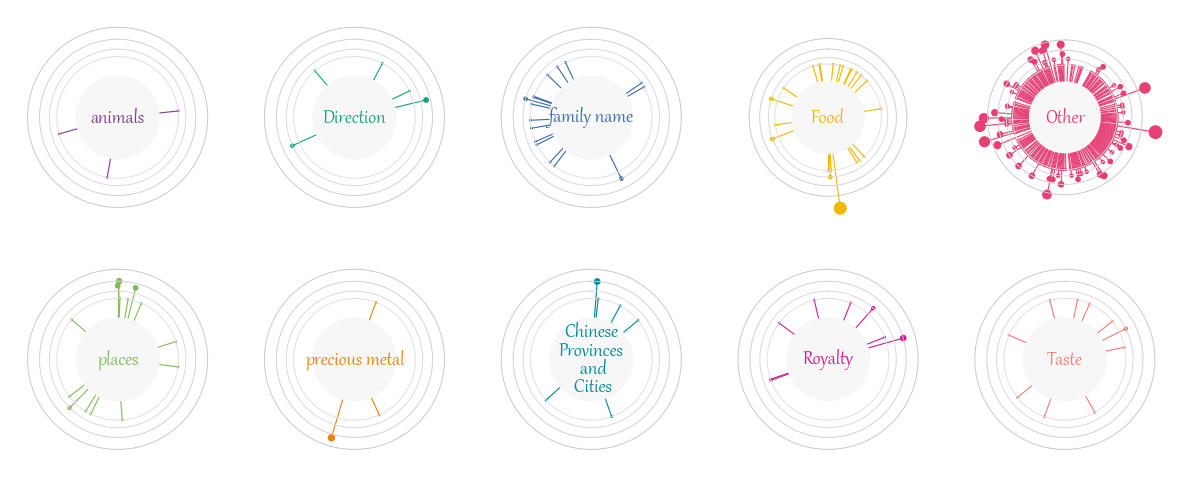

In [323]:
# The plot consists of 2 rows and 5 columns (10 categories in total)
fig, axes = plt.subplots(2, 5, figsize=(15, 6), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")

# Define the slices used to iterate through 'axes'.
# It iterates in a rowwise manner.
# It starts in the first row, and iterates over all the columns of that row
# from left to right, then it goes to the next row and does the same.
SLICES = [(i, j) for i in range(2) for j in range(5)]


for category, label, slice_ in zip(CATEGORIES, LABELS, SLICES):
    # Select axis
    ax = axes[slice_]

    # Select indexes corresponding to the words in this category
    idx = word_count_df.index[word_count_df["category"] == category].tolist()
    
    # Subset ANGLES, HEIGHTS, and COLORS to use the ones for this category.
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    # Create circular plot
    circular_plot(angles, heights, colors, 0.8, ax)
    
    # Add text within the inner circle representing the category
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Gabriola", fontsize=16, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes

    
    )


# Adjust space between subplots.
# 'wspace=0' leaves no horizontal space between subplots.
# 'hspace=0' leaves no vertical space between subplots.
fig.subplots_adjust(wspace=0.1, hspace=0.1)

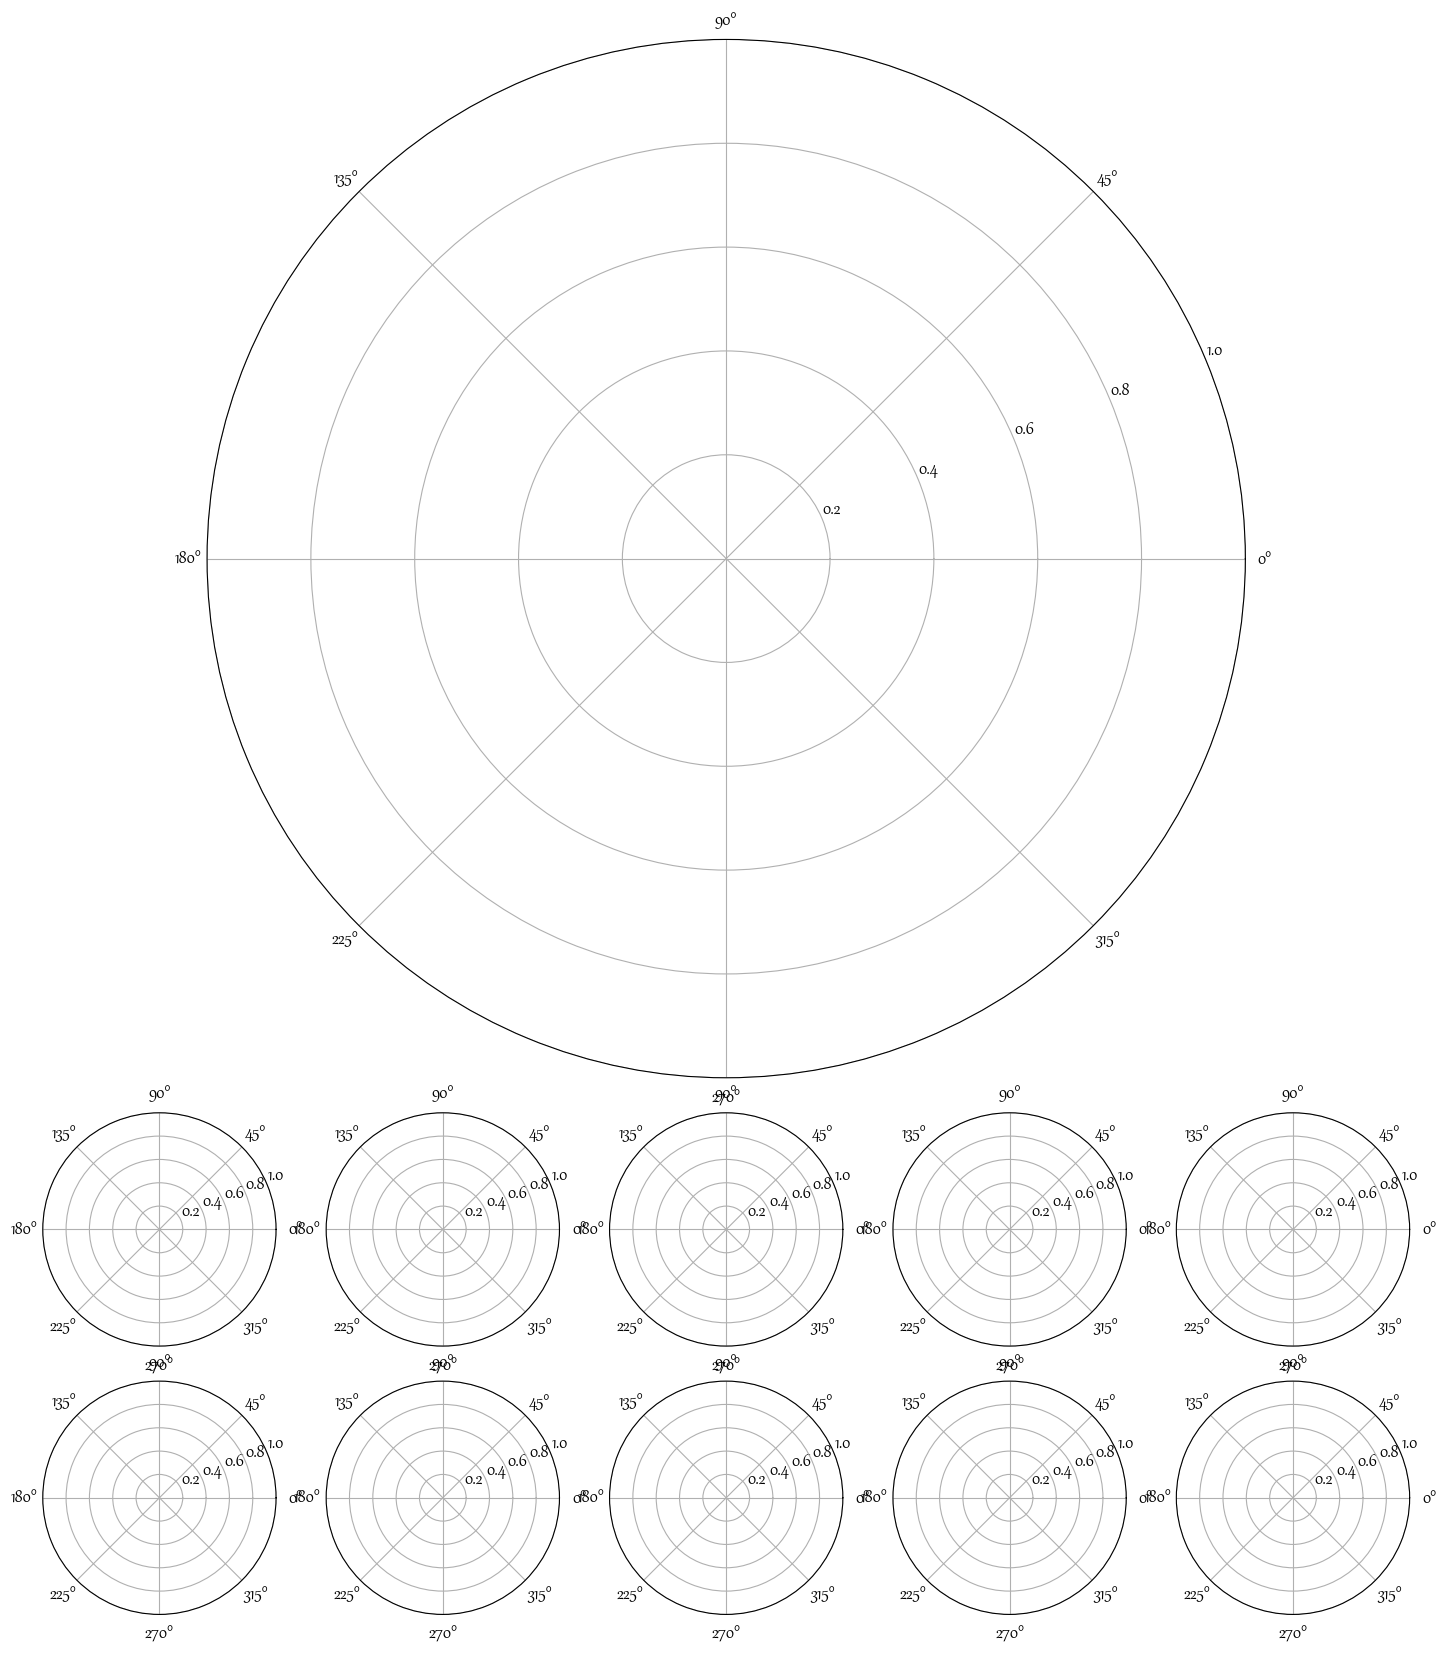

In [324]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 17.5), subplot_kw={"projection": "polar"})
fig.patch.set_facecolor("white")
gs = axes[0, 0].get_gridspec()

# Remove the underlying axes for the subplots that are going to be combined
for i in range(4):
    for j in range(5):
        axes[i, j].remove()

# Combine subplots into one larger subplot
ax_big = fig.add_subplot(
    gs[:4, :], # takes all the subplots on the first 4 rows.
    projection="polar" # indicates this big axis uses a polar projection
)

# Set its aspect to "equal" so it is centered
ax_big.set_aspect("equal")

# Adjust margin and space between subplots
fig.subplots_adjust(
    left=0.04, bottom=0.05, right=0.96, top=0.95, # margins
    wspace=0.15, hspace=.15 # spaces

)

# Final Circular Lolipop Plot

In [325]:
# Add circular plot
circular_plot(ANGLES, HEIGHTS, COLORS, 1.4, ax_big)
# Add text annotations
for idx, row in LABELS_DF.iterrows():
    color=COLORS[row["index"]]
    ax_big.text(
        ANGLES[row["x"]], row["y"], row["label"], ha="right", va="center",
        ma="center", size=17, family="Gabriola", weight="bold", color=color
    )


ax_big.text(
    x=0.5, y=0.51, s="*****\nA Highly\nScientific Analysis\n of \nChinese Restaurant Names\n in NYC\n*****",
    color=GREY60, va="center", ha="center", ma="center", fontfamily="Gabriola",
    fontsize=28, fontweight="bold", linespacing=0.95, transform=ax_big.transAxes
)
fig

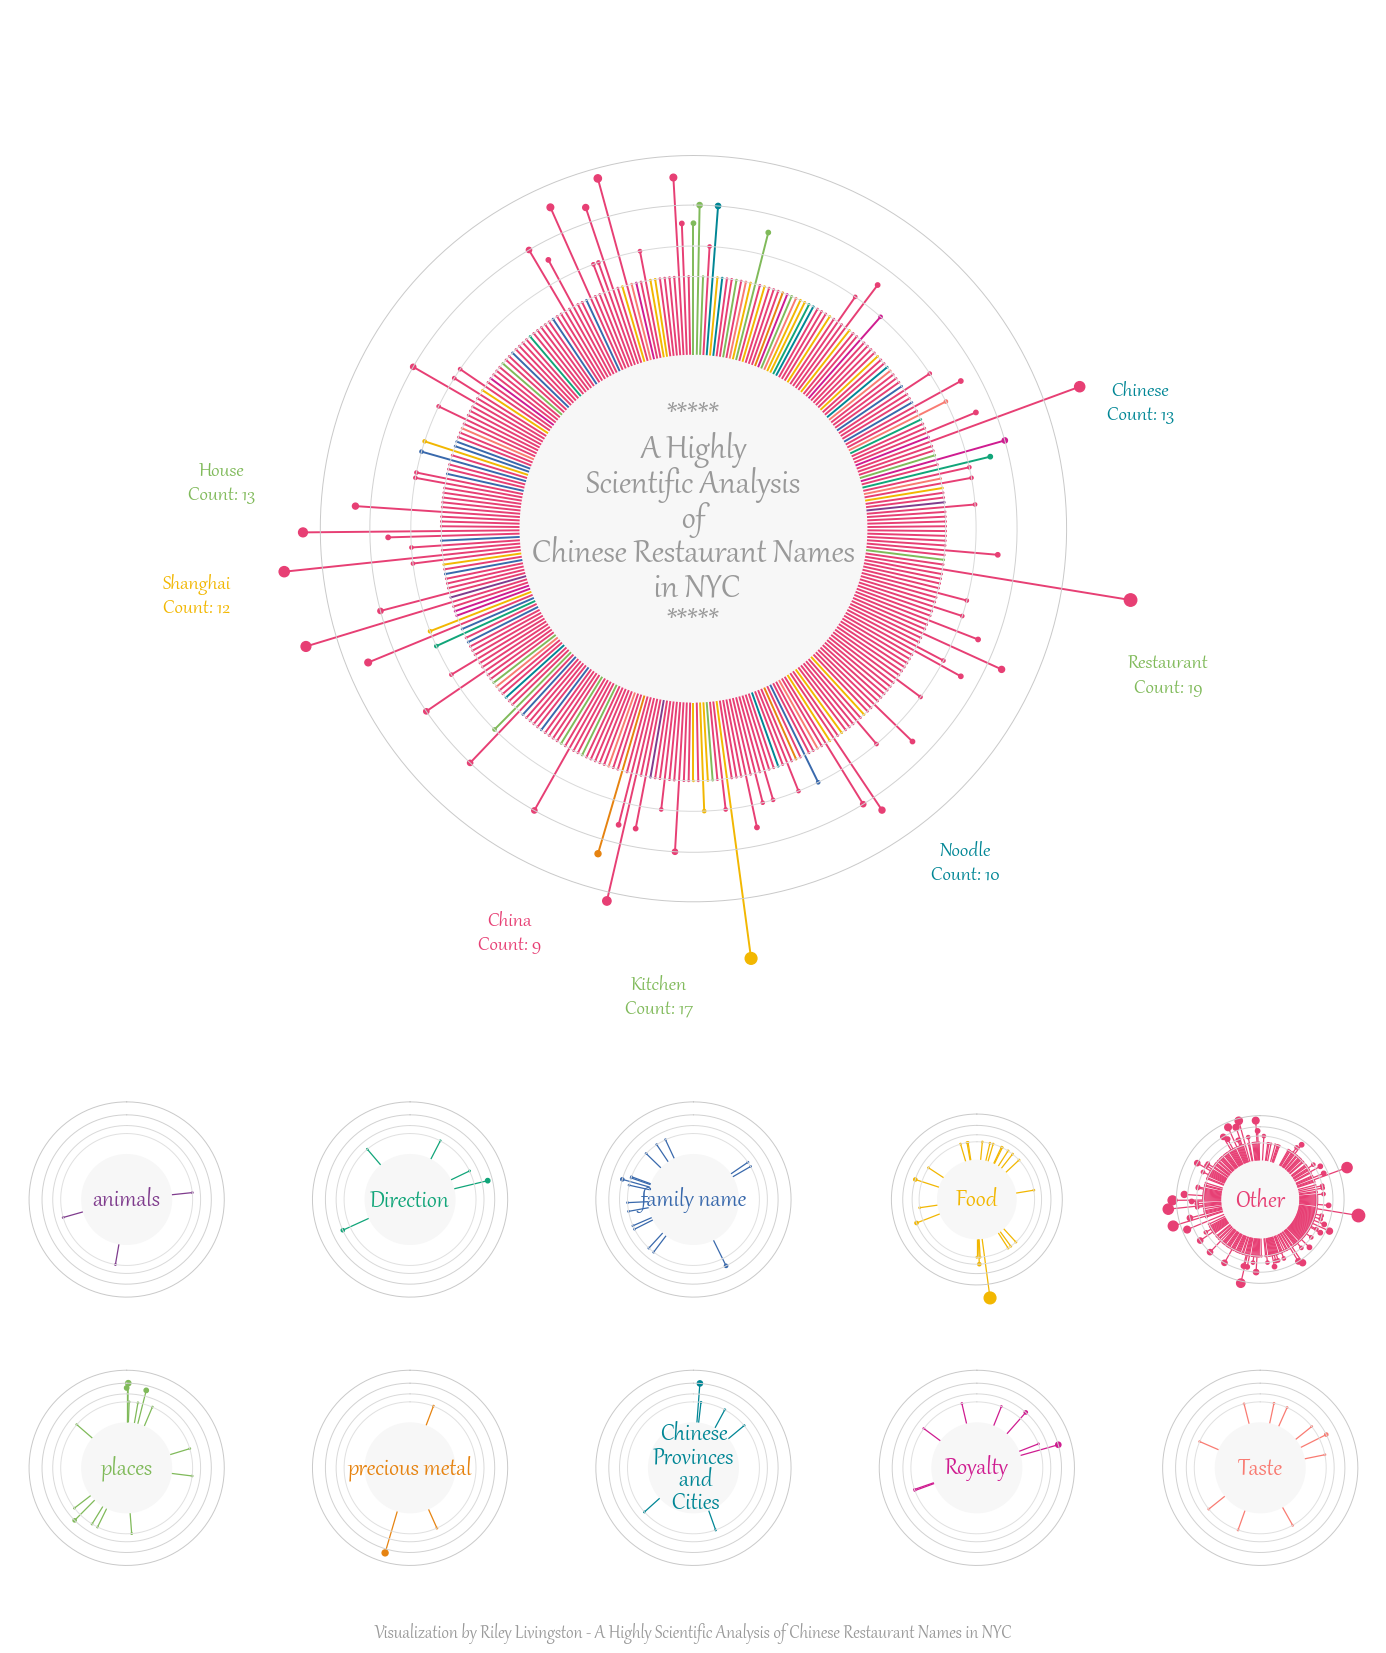

In [326]:
# Note these have changed because we iterate on rows 
# 4 and 5 (fifth and sixth, respectively)
slices = [(i + 4, j) for i in range(2) for j in range(5)]

for category, label, idx_ax in zip(CATEGORIES, LABELS, slices):
    ax = axes[idx_ax]
    idx = word_count_df.index[word_count_df["category"] == category].tolist()
    
    angles = ANGLES[idx]
    heights = HEIGHTS[idx]
    colors = COLORS[idx]
    
    circular_plot(angles, heights, colors, 0.9, ax)
    
    ax.text(
        x=0.5, y=0.5, s=label, color=colors[0], va="center", ha="center",
        ma="center", fontfamily="Gabriola", fontsize=20, fontweight="bold",
        linespacing=0.87, transform=ax.transAxes
    )

fig.text(
    x=0.5, y=0.02, s="Visualization by Riley Livingston - A Highly Scientific Analysis of Chinese Restaurant Names in NYC",
    color=GREY60, fontsize=15, ha="center", fontfamily="Gabriola", fontweight="bold"
)

fig.savefig("circular_lollipop.png", dpi=300)
fig

### Donut Chart

In [327]:
common_word_list = ['Restaurant', 'Kitchen',  'Chinese', 'China', 'House']

In [328]:
restaurant_kitchen = word_count_df[word_count_df['word'].isin(common_word_list)]


In [329]:
temp_df = pd.DataFrame({'index': [9],
                        'word': ['Other'],
                        'percent_of_restaurants': [1-(0.088372 + .079070 + .060465 + .060465+  .041860 +  .004651)],
                        'category': ['other']})

In [330]:
temp_df

index   word  percent_of_restaurants category
0      9  Other                0.665117    other

In [331]:
restaurant_kitchen = restaurant_kitchen.append(temp_df, ignore_index=True)

C:\Users\riley\AppData\Local\Temp\ipykernel_6384\1571482830.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [332]:
restaurant_kitchen=restaurant_kitchen.sort_values(by='percent_of_restaurants', ascending=False)

In [334]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 15})

plt.rcParams["font.family"] = 'Gabriola'



# The slices will be ordered and plotted counter-clockwise.
labels = 'Restaurant', 'Kitchen',  'Chinese', 'China', 'House', 'Other'
sizes = [8.9, 8.0, 6.0, 4.1, 6, 66.5]
colors = ["#cc232a", "#f5ac27", "#ffd84b", "#f2888b", "#cc9902", "#a3262a"]
explode = (0.02, 0.02, 0.02, 0.02, 0.02, 0.0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.2)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal') 
fig.text(x=0.5, y=0.02, s='"House", "China", "Chinese"," Kitchen", and "Restaurant" are in ~33% of Chinese Restaurant Names in NYC',
    color='black', fontsize=20, ha="center", fontfamily="Gabriola", fontweight="bold")

fig.savefig("donut.png", dpi=300)

### Choropleth Map

In [335]:
china_provinces_df1 = word_count_df[word_count_df['word'].isin(['Shanghai', 'Hunan', 'Sichuan'])]

In [336]:
china_provinces_df1

level_0  index      word  count  percent_of_words  percent_of_restaurants  \
4         4      5  Shanghai     12          0.021127                0.055814   
26       26     30     Hunan      4          0.007042                0.018605   
46       46     50   Sichuan      2          0.003521                0.009302   

    category  rank  
4   province     5  
26  province    22  
46  province    61

In [337]:
import json

In [338]:
chinese_provinces = json.load(open("C:\\Users\\riley\\OneDrive\\Desktop\\Data Portfolio Project\\a_highly_scientific_analysis_of_chinese_restaurant_names\\gadm36_CHN_1.json"))

In [339]:
chinese_provinces

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[116.12962341, 29.82485008],
      [116.05905914, 30.20925522],
      [115.76095581, 30.67427635],
      [116.0011673, 30.9495163],
      [115.87502289, 31.14422417],
      [115.55741119, 31.15970039],
      [115.36437225, 31.40503883],
      [115.49180603, 31.67566681],
      [115.90435791, 31.82001877],
      [115.93076324, 32.16601944],
      [115.82931519, 32.52696991],
      [115.61597443, 32.41099548],
      [115.19152832, 32.5904808],
      [115.13391113, 32.89952469],
      [115.28569031, 33.13598633],
      [115.40752411, 33.55921555],
      [115.63195038, 33.58683777],
      [115.54928589, 33.89166641],
      [115.7220459, 34.08029938],
      [116.14985657, 33.71124649],
      [116.63354492, 33.98846436],
      [116.51093292, 34.29732513],
      [116.17365265, 34.43161392],
      [116.18591309, 34.57946777],
      [116.36860657, 34.64086914],
      [116.8230

In [340]:
chinese_provinces['features'][0].keys()

dict_keys(['type', 'geometry', 'properties'])

In [341]:
chinese_provinces

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[116.12962341, 29.82485008],
      [116.05905914, 30.20925522],
      [115.76095581, 30.67427635],
      [116.0011673, 30.9495163],
      [115.87502289, 31.14422417],
      [115.55741119, 31.15970039],
      [115.36437225, 31.40503883],
      [115.49180603, 31.67566681],
      [115.90435791, 31.82001877],
      [115.93076324, 32.16601944],
      [115.82931519, 32.52696991],
      [115.61597443, 32.41099548],
      [115.19152832, 32.5904808],
      [115.13391113, 32.89952469],
      [115.28569031, 33.13598633],
      [115.40752411, 33.55921555],
      [115.63195038, 33.58683777],
      [115.54928589, 33.89166641],
      [115.7220459, 34.08029938],
      [116.14985657, 33.71124649],
      [116.63354492, 33.98846436],
      [116.51093292, 34.29732513],
      [116.17365265, 34.43161392],
      [116.18591309, 34.57946777],
      [116.36860657, 34.64086914],
      [116.8230

In [342]:
chinese_provinces['features'][0]['properties']

{'GID_0': 'CHN',
 'NAME_0': 'China',
 'GID_1': 'CHN.1_1',
 'NAME_1': 'Anhui',
 'VARNAME_1': 'Ānhuī',
 'NL_NAME_1': '安徽|安徽',
 'TYPE_1': 'Shěng',
 'ENGTYPE_1': 'Province',
 'CC_1': '',
 'HASC_1': 'CN.AH'}

In [343]:
province_id_map = {}
for feature in chinese_provinces['features']:
    feature['id'] = feature['properties']['NAME_1']
    province_id_map[feature['properties']['NAME_1']] =feature['id']

In [344]:
province_id_map

{'Anhui': 'Anhui',
 'Beijing': 'Beijing',
 'Chongqing': 'Chongqing',
 'Fujian': 'Fujian',
 'Gansu': 'Gansu',
 'Guangdong': 'Guangdong',
 'Guangxi': 'Guangxi',
 'Guizhou': 'Guizhou',
 'Hainan': 'Hainan',
 'Hebei': 'Hebei',
 'Heilongjiang': 'Heilongjiang',
 'Henan': 'Henan',
 'Hubei': 'Hubei',
 'Hunan': 'Hunan',
 'Jiangsu': 'Jiangsu',
 'Jiangxi': 'Jiangxi',
 'Jilin': 'Jilin',
 'Liaoning': 'Liaoning',
 'Nei Mongol': 'Nei Mongol',
 'Ningxia Hui': 'Ningxia Hui',
 'Qinghai': 'Qinghai',
 'Shaanxi': 'Shaanxi',
 'Shandong': 'Shandong',
 'Shanghai': 'Shanghai',
 'Shanxi': 'Shanxi',
 'Sichuan': 'Sichuan',
 'Tianjin': 'Tianjin',
 'Xinjiang Uygur': 'Xinjiang Uygur',
 'Xizang': 'Xizang',
 'Yunnan': 'Yunnan',
 'Zhejiang': 'Zhejiang'}

In [345]:
china_provinces_df1['id'] = china_provinces_df1['word'].apply(lambda x:province_id_map[x])

C:\Users\riley\AppData\Local\Temp\ipykernel_6384\1203971792.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [346]:
china_provinces_df1

level_0  index      word  count  percent_of_words  percent_of_restaurants  \
4         4      5  Shanghai     12          0.021127                0.055814   
26       26     30     Hunan      4          0.007042                0.018605   
46       46     50   Sichuan      2          0.003521                0.009302   

    category  rank        id  
4   province     5  Shanghai  
26  province    22     Hunan  
46  province    61   Sichuan

In [347]:
chinese_provinces_df = pd.DataFrame(chinese_provinces_list, columns=['id'])

In [348]:
china_provinces_df1= pd.merge(chinese_provinces_df, china_provinces_df1, on='id', how='left')

In [349]:
china_provinces_df1['word'] = china_provinces_df1['id']

In [350]:
china_provinces_df1 = china_provinces_df1.fillna(0)

In [351]:
import plotly.express as px
import plotly.io as pio

In [352]:
pio.renderers.default = ('browser')

In [353]:
fig = px.choropleth(china_provinces_df1, 
                        locations='word', 
                        fitbounds='locations',
                        geojson=chinese_provinces, color='count', 
                        hover_data = ['count'],
                        color_continuous_scale = px.colors.sequential.OrRd,

                        
                        )
fig.update_layout(title='Provinces in Chinese Restaurant Names', font_family='Gabriola', font_size=16.5)
fig.update_layout(title={
        'text': "Provinces in Chinese Restaurant Names",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
                  
fig.update_geos(fitbounds='locations', visible=False)
fig.update_traces(hovertemplate=None)

fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=7,
    lenmode="pixels", len=110,
    yanchor="top", y=0.75,
    ticks="outside",
    dtick=4, 
    title='Count',
))
fig.show()
fig.write_html("plotly_choropleth.html")


### Barplots

In [354]:
word_count_df['category'].value_counts()


other             242
food               23
family name        16
places             14
tastes             10
royalty             8
province            6
direction           5
precious metal      3
animals             3
Name: category, dtype: int64

In [355]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(24,24))

# plot data for place
mask = word_count_df['category'] =='places'
df_places = word_count_df[mask]

ax[0, 0].bar(df_places['word'],df_places['count'], color="#FFD84B")
ax[0, 0].set_title('Places')
ax[0, 0].set_xlabel("")
ax[0, 0].set_ylabel('Count')
ax[0, 0].set_xticklabels(df_places['word'], rotation=60)

# plot data for taste
mask2 = word_count_df['category'] =='tastes'
df_taste = word_count_df[mask2]
ax[0, 1].bar(df_taste['word'],df_taste['count'], color="#F5AC27")
ax[0, 1].set_title('Taste')
ax[0, 1].set_xlabel("")
ax[0, 1].set_ylabel('Count')
ax[0, 1].set_xticklabels(df_taste['word'], rotation=60)

#plot the data for royalty
mask3 = word_count_df['category'] =='royalty'
df_royalty = word_count_df[mask3]
ax[1, 0].bar(df_royalty['word'],df_royalty['count'], color="#F2888B")
ax[1, 0].set_title('Royalty')
ax[1, 0].set_xlabel('Word')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_xticklabels(df_royalty['word'], rotation=60)


#plot the data for food
mask4 = word_count_df['category'] == 'food'
df_food = word_count_df[mask4]
ax[1, 1].bar(df_food['word'],df_food['count'], color="#CC232A")
ax[1, 1].set_title('Food')
ax[1, 1].set_xlabel('Word')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_xticklabels(df_food['word'], rotation=60)

plt.show()

C:\Users\riley\AppData\Local\Temp\ipykernel_6384\2874181201.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\riley\AppData\Local\Temp\ipykernel_6384\2874181201.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\riley\AppData\Local\Temp\ipykernel_6384\2874181201.py:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\riley\AppData\Local\Temp\ipykernel_6384\2874181201.py:39: UserWarning:

FixedFormatter should only be used together with FixedLocator



In [356]:
temp_category_list = ['places', 'tastes', 'royalty', 'precious metal', 'food', 'animals']

In [357]:
word_count_df_filt = word_count_df[word_count_df['category']=='family name']

In [358]:
px_categories = word_count_df[word_count_df['category'].isin(temp_category_list)]

In [359]:
fig = px.bar(px_categories, 
             x='count', 
             y='word', 
             title='Describing Taste', 
             color='category', color_discrete_map={'places': '#A3262A', 
                                                   'food': '#F2888B', 
                                                   'tastes': '#F5AC27', 
                                                   'animals': '#FFD84B' , 
                                                   'royalty': '#4c8c4c', 
                                                   'precious metal': '#a1aaa8', 'direction': '#97c1df' })
fig.update_layout(title='Word themes in NYC Chinese Restaurant Names', font_family='Gabriola', font_size=14)
fig.update_layout(title={
        'text': "Word Themes in NYC Chinese Restaurant Names",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


### Sunburst Chart

In [360]:
word_count_df_filt = word_count_df[word_count_df['category'].isin(temp_category_list)]

In [361]:
word_count_df_filt = word_count_df[word_count_df['category']=='family name']

In [362]:
fig = px.sunburst(
    word_count_df_filt, 
    path=['category', 'word'],
    values='count',
    color='count', 
    color_continuous_scale= 'Burgyl',
hover_data=['count'])

fig.update_layout(title='Word themes in NYC Chinese Restaurant Names', font_family='Gabriola', font_size=14)
fig.update_layout(title=('Family Names in NYC Chinese Restaurants'))
fig.update_layout(title={
        'text': 'Family Names in NYC Chinese Restaurant Names',
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=3.5,
    lenmode="pixels", len=100,
    yanchor="top", y=0.85,
    ticks="outside",
    dtick = 4,
    title='Count'))

fig.update_traces(hovertemplate=None)


fig.show()
fig.write_html("family_name_sunburst.html")